# Taller 1: MINE-401

### Santiago Segura : 201617653

Importando las librerias necesarias.

In [510]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from math import isnan
import seaborn as sb

## Punto 1
Haciendo un  primer inteto para leer el archivo directamente con pandas, se puede apreciar que hay algunas filas que cuentan con comillas externas, haciendo que el dataframe quede con los datos solo en la primera columna. Además se evidencia un error en la línea 1977. 

In [2]:
data_read=pd.read_csv('Data_Taller_1.csv',error_bad_lines=False)

C:\Users\santi\AppData\Local\Temp\ipykernel_7656\1698127246.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_read=pd.read_csv('Data_Taller_1.csv',error_bad_lines=False)
b'Skipping line 1977: expected 18 fields, saw 19\n'


Para poder arreglar esto, se procede a modificar el archivo original con la libreria csv y luego  leerlo con pandas para su posterior análisis. En este proceso se eliminan las dobles comillas que tienen algunas filas para que su lectura sea más fácil.

In [3]:
with open('data_procesed.csv', 'w',encoding="utf8") as file:
    with open('Data_Taller_1.csv', encoding="utf8") as csv_file:
        csv_reader= csv.reader(csv_file,delimiter=',')
        #csv_writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        number_row=0
        for row in csv_reader:
            number_row+=1
            #Case where there is just one element in list
            if len(row) != 18:
                row=row[0].strip('\"').split("\',\'")
            #final_string=str(row).strip('[];')
            line=",".join(row)
            file.write(line+'\n')
        
        

In [95]:
data_read=pd.read_csv('data_procesed.csv',na_values=None)
data_read

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre;
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop;
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop;"
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country;"
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal;"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026.0,False,2019.0,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop;
1996,Taylor Swift,Cruel Summer,178426.0,False,2019.0,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop;
1997,Blanco Brown,The Git Up,200593.0,False,2019.0,69.0,0.847,0.678,9.0,-8.635,1.0,0.1090,0.0669,0.000000,0.2740,0.811,NaN,"hip hop, country;"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029.0,False,2019.0,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop;


Se hace una limpieza de la la columna género: Eliminar punto y coma 

In [96]:
 def eliminar_coma(x):
    #Elimina el ; de la columna genero
    if type(x['genre']) is str:
        x['genre']=x['genre'].strip(";")
    return x

In [97]:
data_read=data_read.rename(columns={"genre;": "genre"})
data_read=data_read.apply(eliminar_coma,axis=1)

In [98]:
data_read.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Se hace un resumen de las columnas del dataset

In [99]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1997 non-null   float64
 3   explicit          1998 non-null   object 
 4   year              1999 non-null   float64
 5   popularity        1996 non-null   float64
 6   danceability      1996 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   float64
 9   loudness          1998 non-null   float64
 10  mode              1999 non-null   float64
 11  speechiness       1998 non-null   float64
 12  acousticness      1996 non-null   float64
 13  instrumentalness  1998 non-null   float64
 14  liveness          1999 non-null   float64
 15  valence           1998 non-null   float64
 16  tempo             1997 non-null   float64


De esto se puede observar el tipo de dato de cada columna y sus valores no nulos. Debido a que cada columna tiene datos muy cercanos a los 2000 (total del conjunto de datos), considero que no es necesario hacer una limpieza de estos. Para el caso de las variables númericas, los remplazare por valores 0. 

In [100]:
numeric_columns=['duration_ms','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
for column in numeric_columns:
    data_read[column]=data_read[column].fillna(0)

Como parte del proceso de limpieza se eliminan los datos duplicados

In [101]:
data_read=data_read.drop_duplicates()

Obteniendo una pequeña descripción de las variables númericas

In [102]:
data_read.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1940.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228257.543534,2009.515464,59.485832,0.666420,0.721292,5.364760,-5.506139,0.552808,0.103732,0.128011,0.015372,0.181317,0.552502,119.974103
std,40254.914704,5.873101,21.662296,0.143771,0.153663,3.616382,1.945370,0.497332,0.096188,0.172621,0.088371,0.140280,0.221530,27.346324
min,0.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,-20.514000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203466.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.487000,0.000000,0.039700,0.013200,0.000000,0.088200,0.388000,98.985000
50%,223133.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.283000,1.000000,0.061000,0.055600,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.167000,1.000000,0.129000,0.176000,0.000069,0.241000,0.731000,134.170000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,0.000000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Haciendo revisión de algunas de las variables categoricas se obtiene lo siguiente: 

Nota: Para facilitar la visualización en algunas de las gráficas solo se obtuvieron los primeros resultados

In [103]:
gender=data_read['genre'].value_counts().keys().tolist()[:15]
frequency_gen=data_read['genre'].value_counts().tolist()[:15]

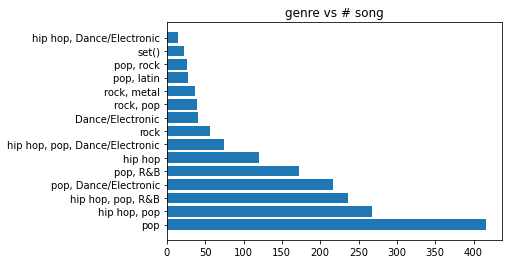

In [104]:
plt.barh(gender,frequency_gen,linewidth='1')
plt.title('genre vs # song')
plt.show()

In [105]:
artist=data_read['artist'].value_counts().keys().tolist()[:20]
frequency_art=data_read['artist'].value_counts().tolist()[:20]

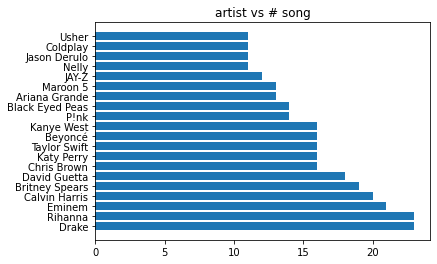

In [106]:
plt.barh(artist,frequency_art,linewidth='1')
plt.title('artist vs # song')
plt.show()

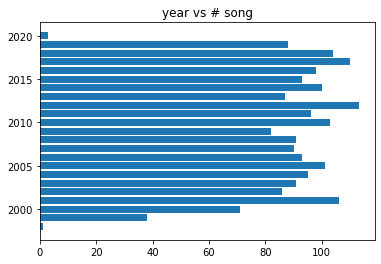

In [107]:
years=data_read['year'].value_counts().keys().tolist()
frequency_year=data_read['year'].value_counts().tolist()
plt.barh(years,frequency_year)
plt.title('year vs # song')
plt.show()

De esta revisión de variables, en la gráfica del género se puede ver que hay un valor que corresponde a set(). Por lo que se procede a reemplazarlo por un valor de string vacio

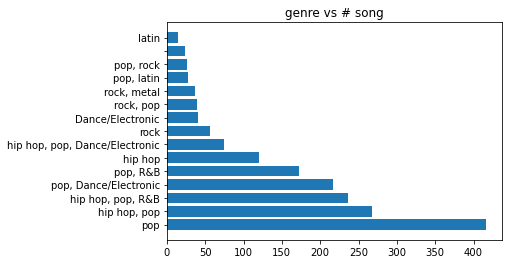

In [108]:
data_read['genre']=data_read['genre'].replace('set()','')
gender=data_read['genre'].value_counts().keys().tolist()[:15]
frequency_gen=data_read['genre'].value_counts().tolist()[:15]
plt.barh(gender,frequency_gen,linewidth='1')
plt.title('genre vs # song')
plt.show()

## Punto 1: 
¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

Para comenzar se halla el  valor máximo de año que se encuentra en el dataset. Y se filtran todos los datos cuyo año no esté dentro del rango de los últimos diez. Para definir la actividad de un artista, se hará un conteo del número de canciones que aparezcan en el rango de años y de estos se sacará el top 10. 

In [109]:
max_year=max(data_read['year'])
min_year=max_year-10
data_lastyears=data_read[data_read['year']>=min_year]

In [110]:
top_10=data_lastyears.groupby(by=['artist']).count().sort_values(by=['song'],ascending=False)[:10]

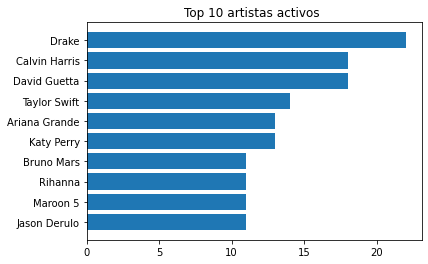

In [112]:
plt.barh(top_10.index,top_10['song'] ,linewidth='1')
plt.title('Top 10 artistas activos ')
plt.gca().invert_yaxis()
plt.show()

In [113]:
print('De esto se puede concluir que el top de artistas más activos de los ultimos 10 años son : {}'.format(str(list(top_10.index))))

De esto se puede concluir que el top de artistas más activos de los ultimos 10 años son : ['Drake', 'Calvin Harris', 'David Guetta', 'Taylor Swift', 'Ariana Grande', 'Katy Perry', 'Bruno Mars', 'Rihanna', 'Maroon 5', 'Jason Derulo']


## Punto 2

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con
su duración? Halle la diferencia del tiempo promedio de ambos géneros

In [114]:
genre='latin'
data_genre_nonan=data_read[data_read['genre'].notnull()] #Excluir datos que tengan el genero nulo
data_latin=data_genre_nonan[data_genre_nonan['genre'].str.contains(genre)] #Seleccionar datos con genero latin
mean_latin=data_latin['duration_ms'].mean() #Promedio de duracion
print(' El promedio de duración para canciones del genero {}  es {} s'.format(genre, mean_latin*0.001))

 El promedio de duración para canciones del genero latin  es 227.49468253968254 s


In [115]:
genre2='Folk/Acoustic'
data_folk=data_genre_nonan[data_genre_nonan['genre'].str.contains(genre2)] #Seleccionar datos con genero folk
mean_folk=data_folk['duration_ms'].mean() #Promedio de duracion
print('El promedio de duración para canciones del genero {}  es {} s'.format(genre2,mean_folk*0.001))

El promedio de duración para canciones del genero Folk/Acoustic  es 220.18365 s


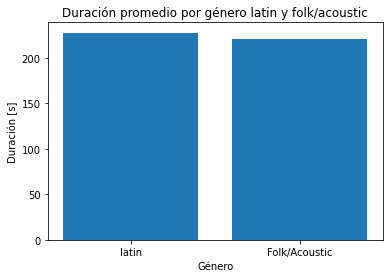

In [116]:
genres=[genre,genre2]
means=[mean_latin*0.001,mean_folk*0.001]
plt.bar(genres,means)
plt.title('Duración promedio por género latin y folk/acoustic')
plt.xlabel('Género')
plt.ylabel('Duración [s]')
plt.show()

In [117]:
#Hallando la difernecia de tiempos promedios
rest=abs(mean_latin-mean_folk)
print('La diferencia de los tiempos pomedios es de {} s'.format(rest*0.001))

La diferencia de los tiempos pomedios es de 7.31103253968255 s


Con estos resultados se puede observar que en promedio las canciones del género latino duran 7.49 segundos  más que que las del género folk/acoustic.

## Punto 3
Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la
cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

Para facilitar el tratamiento de datos se procede a hacer un explode de los datos con la columna género. Así se obtiene una fila por cada género de la canción

In [148]:
def list_genre(x):
    #Funcion para convertir a una lista los elementos de la columna genero
    x['genre']=x['genre'].split(", ")
    return x

In [149]:
#Filtrar datos del 2019
data_2019=data_read[data_read['year']==2019]
#Se convierten los datos de la columna genero en una lista para luego hacer un explode de esta columna
data_2019=data_2019.apply(list_genre,axis=1)
data_2019=data_2019.explode('genre')

Se hace un groupby del dataframe por la columna genero y se hace el conteo de las canciones para cada género.

In [162]:
top5_genre2019=data_2019.groupby(by='genre').count().sort_values('song',ascending=False).head(5)
genres_19=top5_genre2019.index
song_gen19=top5_genre['song']
#Guardando en un diccionario
top_2019 = {genres_19[i]:song_gen19[i] for i in range(len(genres_19))}

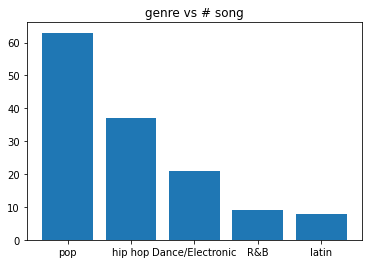

In [163]:
plt.bar(genres_19,song_gen19)
plt.title('genre vs # song')
plt.show()

Ahora para cada año se realiza un conteo de canciones por género.

In [212]:
def top5genderbyyear(year,data_frame):
    #Funcion para hallar el conteo de canciones por genero en un año
    #year: int representa año
    #data_frame: data_frame pandas de todo el dataset
    data_year=data_frame[data_frame['year']==year]
    data_year=data_year.apply(list_genre,axis=1)
    data_year=data_year.explode('genre')
    top5_genre=data_year.groupby(by='genre').count().sort_values('song',ascending=False)
    genres=top5_genre.index
    song_gen=top5_genre['song']
    #Guardando en un diccionario
    top = {genres[i]:song_gen[i] for i in range(len(genres))}
    
    return top,genres,song_gen

In [213]:
#Hallando el top para los otros años
top_2000,gen_2000,son_2000= top5genderbyyear(2000,data_read)
top_2005,gen_2005,son_2005= top5genderbyyear(2005,data_read)
top_2010,gen_2010,son_2010= top5genderbyyear(2010,data_read)
top_2015,gen_2015,son_2015= top5genderbyyear(2015,data_read)
top_2019,gen_2019,son_2019= top5genderbyyear(2019,data_read)


Se procede a graficar los resultados. Para este caso se gráfican únicamente los géneros que aparecen en el top 5 del año 2019

In [292]:
#Creando listas por cada genero para graficar
years=[2000,2005,2010,2015,2019]
list_tops=[top_2000,top_2005,top_2010,top_2015,top_2019]
list_pop=[]
list_hip=[]
list_dance=[]
list_rb=[]
list_latin=[]
for i in list_tops:
    list_pop.append(i['pop'])
    list_hip.append(i['hip hop'])
    list_dance.append(i['Dance/Electronic'])
    list_rb.append(i['R&B'])
    if 'latin' in i:
        list_latin.append(i['latin'])
    else: 
        list_latin.append(0)
    


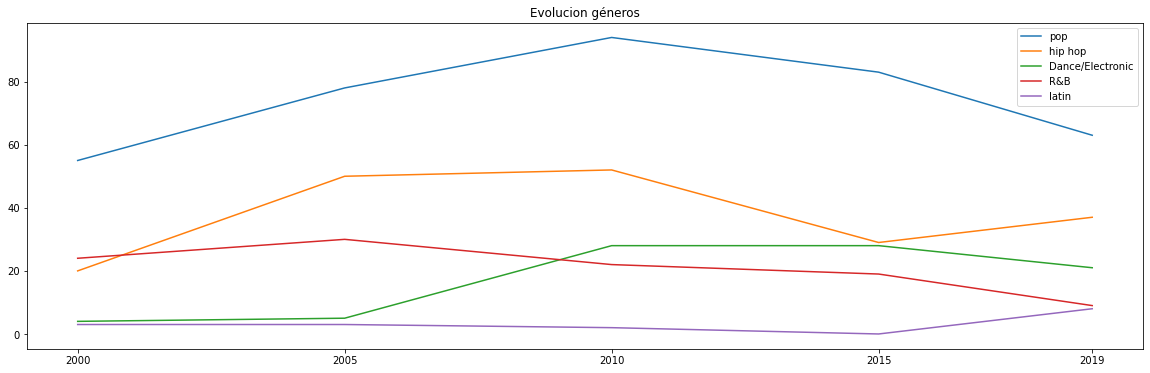

In [296]:
fig,ax=plt.subplots(figsize=(20,6))
plt.title('Evolucion géneros')
plt.plot(years,list_pop,label='pop')
plt.plot(years,list_hip,label='hip hop')
plt.plot(years,list_dance,label='Dance/Electronic')
plt.plot(years,list_rb,label='R&B')
plt.plot(years,list_latin,label='latin')
plt.xticks(years,years)
plt.legend()
plt.show()

De esto se puede concluir que el género con más canciones en estos años es el pop. Siempre se mantiene en el top 1. Para el género R&B hay una tendencia de disminución, exceptuando el año 2005. Los demás géneros no tienen un comportamiento que pareciera seguir una tendencia. 

## Punto 4

¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del
cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [310]:
#Creando rango de años 
initial_year= min(data_read['year'])
max_year=max(data_read['year'])+1
years=[*range(int(initial_year), int(max_year))]

In [288]:
# 
prueba_data=data_read.copy().drop_duplicates()
conteo=[]
prueba_data['new_artist']=0
for i in years:
    contador=0
    artists_year=prueba_data[(prueba_data['year']==i) & (prueba_data['new_artist']==0)]
    contador=len(pd.unique(artists_year['artist']))
    list_artist=artists_year['artist'].tolist()
    prueba_data.loc[(prueba_data['artist'].isin(list_artist)),'new_artist']=1 #Cambio estado a artista no nuevo
    conteo.append(contador)

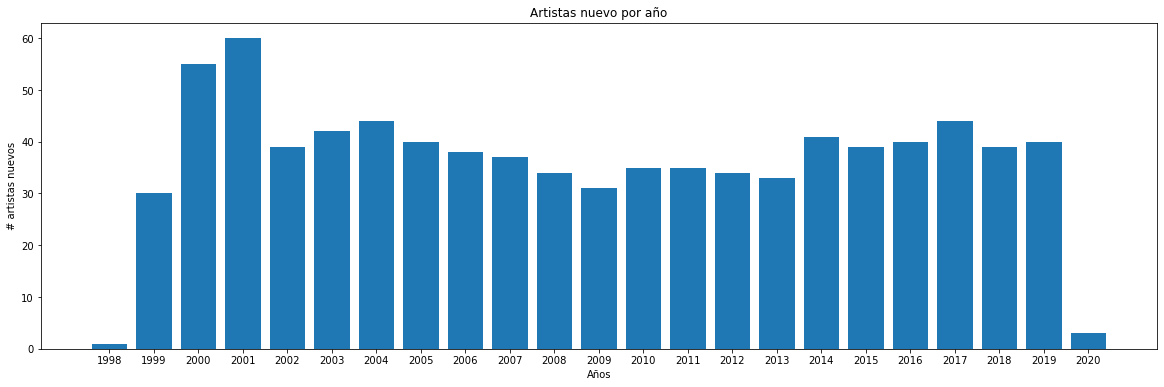

In [290]:
plt.figure(figsize=(20,6))
plt.title('Artistas nuevo por año')
plt.bar(years,conteo)
plt.xticks(years,years)
plt.ylabel('# artistas nuevos')
plt.xlabel('Años')

plt.show()

Como se puede ver en la gráfica el número de artistas nuevos por año tiene su máximo en el año 2019. Los datos de 1998 y 2020 pueden parecer menores pero  esto puede deberse a que son el primer año y último del datasetl, pueden estar incompletos.

## Punto 5 
Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre
la gráfica, ej: ¿existen tendencias?

Para realizar los calculos, se realiza un recorrido de los años. Por cada año, se seleccionan las canciones correspondientes a ese año. Se agrupan por género usando como función de agrupación el promedio. Luego se agregan a una lista que contienen diccionarios para cada año donde las keys son los generos y los valore es el promedio para cada año.

In [378]:
mean_genre=[]
for i in years:
    data_g=data_read[(data_read['genre'].notnull()) & (data_read['year']==i) ].apply(list_genre,axis=1)
    data_g=data_g.explode('genre')
    data_group_genre=data_g.groupby(by='genre').mean()
    mean_genre.append({data_group_genre.index[j]: data_group_genre.popularity.to_list()[j] for j in range(len(data_group_genre.index))})

In [379]:
generos=[]
for i in range(len(mean_genre)):
    for j in  mean_genre[i].keys():
        generos.append(j)

Para graficar se crea una lista por género

In [434]:
list_genders=list(set(generos))
list_genders.pop(0)


''

In [443]:
list_blues=[]
list_country=[]
list_classical=[]
list_World=[]
list_pop=[]
list_metal=[]
list_easy=[]
list_rock=[]
list_folk=[]
list_dance=[]
list_rb=[]
list_latin=[]
list_jazz=[]
list_hip=[]
for i in range(len(years)):
    #Crear lista de promedios genero latino
    genre_temp='latin'
    if genre_temp in mean_genre[i]:
        list_latin.append(mean_genre[i][genre_temp])
    else: 
        list_latin.append(0)
    
    #Crear lista de promedios genero blues
    genre_temp='blues'
    if genre_temp in mean_genre[i]:
        list_blues.append(mean_genre[i][genre_temp])
    else: 
        list_blues.append(0)
        
    #Crear lista de promedios genero country
    genre_temp= 'country'
    if genre_temp in mean_genre[i]:
        list_country.append(mean_genre[i][genre_temp])
    else: 
        list_country.append(0)

    #Crear lista de promedios genero hip hop
    genre_temp= 'hip hop'
    if genre_temp in mean_genre[i]:
        list_hip.append(mean_genre[i][genre_temp])
    else: 
        list_hip.append(0)


    #Crear lista de promedios genero classical
    genre_temp= 'classical'
    if genre_temp in mean_genre[i]:
        list_classical.append(mean_genre[i][genre_temp])
    else: 
        list_classical.append(0)

        #Crear lista de promedios genero World/Traditional
    genre_temp= 'World/Traditional'
    if genre_temp in mean_genre[i]:
        list_World.append(mean_genre[i][genre_temp])
    else: 
        list_World.append(0)
    
        #Crear lista de promedios genero Pop
    genre_temp= 'pop'
    if genre_temp in mean_genre[i]:
        list_pop.append(mean_genre[i][genre_temp])
    else: 
        list_pop.append(0)
        
    #Crear lista de promedios genero Metal
    genre_temp= 'metal'
    if genre_temp in mean_genre[i]:
        list_metal.append(mean_genre[i][genre_temp])
    else: 
        list_metal.append(0)
        
        
    genre_temp= 'rock'
    if genre_temp in mean_genre[i]:
        list_rock.append(mean_genre[i][genre_temp])
    else: 
        list_rock.append(0)  




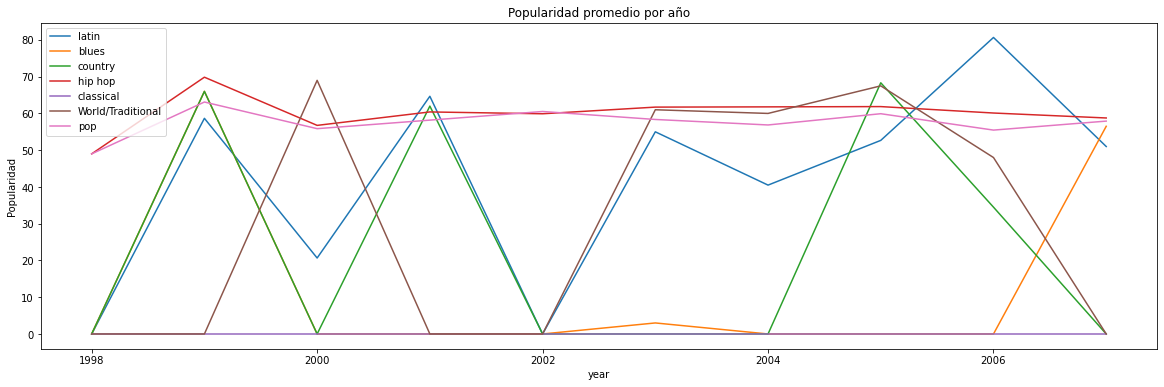

In [429]:
plt.figure(figsize=(20,6))
plt.plot(years[:10],list_latin[:10],label='latin')
plt.plot(years[:10],list_blues[:10],label='blues')
plt.plot(years[:10],list_country[:10],label='country')
plt.plot(years[:10],list_hip[:10],label='hip hop')
plt.plot(years[:10],list_classical[:10],label='classical')
plt.plot(years[:10],list_World[:10],label='World/Traditional')
plt.plot(years[:10],list_pop[:10],label='pop')
plt.plot(years[:10],list_rock[:10],label='rock')
plt.title('Popularidad promedio por año 1998-2007')
plt.legend()
plt.xlabel('year')
plt.ylabel('Popularidad')
plt.show()

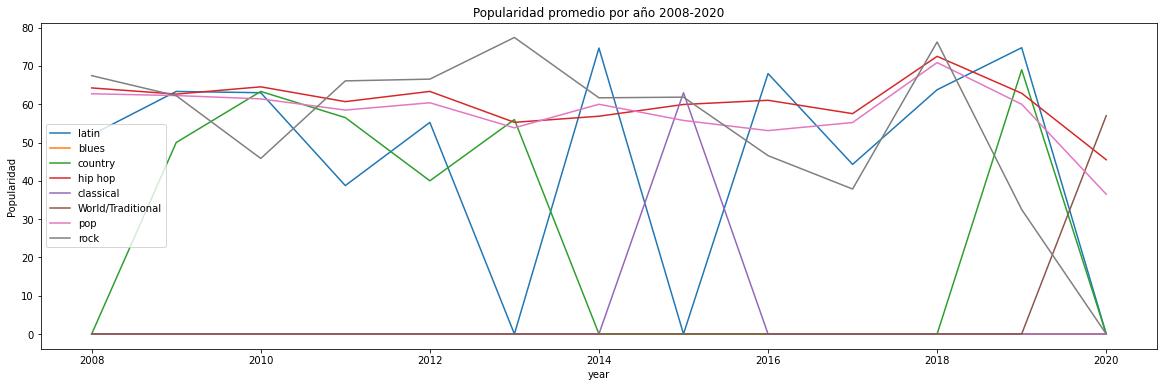

In [444]:
plt.figure(figsize=(20,6))
plt.plot(years[10:],list_latin[10:],label='latin')
plt.plot(years[10:],list_blues[10:],label='blues')
plt.plot(years[10:],list_country[10:],label='country')
plt.plot(years[10:],list_hip[10:],label='hip hop')
plt.plot(years[10:],list_classical[10:],label='classical')
plt.plot(years[10:],list_World[10:],label='World/Traditional')
plt.plot(years[10:],list_pop[10:],label='pop')
plt.plot(years[10:],list_rock[10:],label='rock')
plt.title('Popularidad promedio por año 2008-2020')
plt.legend()
plt.xlabel('year')
plt.ylabel('Popularidad')
plt.show()

Para poder ver la evolución de la popularidad en toda la línea de tiempo, se decicidió realizar en dos gráficas para facilidad del usuario.  De los géneros analizados se puede ver que hay dos que se comportan de manera muy similar durante los años, estos son el pop y hip hop. Como se puede ver en ambas gráficas las lineas de estos dos géneros son muy parecidas. 

## Punto 6
Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.
Concluya sobre su análisis


In [448]:
#Seleccionando datos pertenecientes a pop y rock 
data_genre_nonan=data_read[data_read['genre'].notnull()].apply(list_genre,axis=1).explode('genre') #Excluir datos que tengan el genero nulo
data_pop=data_genre_nonan[(data_genre_nonan['genre'].str.contains('pop'))] #Seleccionar datos con genero pop
data_rock= data_genre_nonan[(data_genre_nonan['genre'].str.contains('rock'))] #Seleccionar datos con genero pop

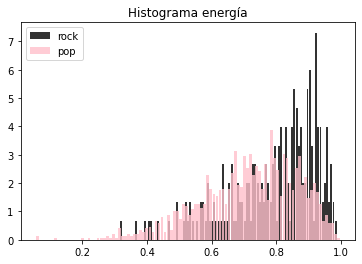

In [470]:
#Graficando histograma de energia
plt.hist(data_rock['energy'], bins=100, alpha=0.8, density=True,color='black',rwidth=0.9,label='rock')
plt.hist(data_pop['energy'],bins=100, alpha=0.8, density=True, color='pink',rwidth=0.9,label='pop')
plt.legend()
plt.title('Histograma energía')
plt.show()

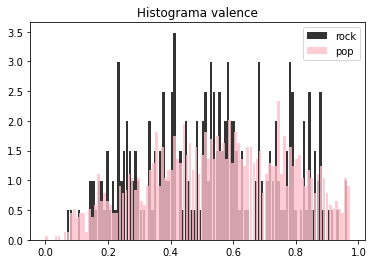

In [472]:
#Graficando histograma de energia
plt.hist(data_rock['valence'], bins=100, alpha=0.8, density=True,color='black',rwidth=0.9,label='rock')
plt.hist(data_pop['valence'],bins=100, alpha=0.8, density=True, color='pink',rwidth=0.9,label='pop')
plt.legend()
plt.title('Histograma valence')
plt.show()

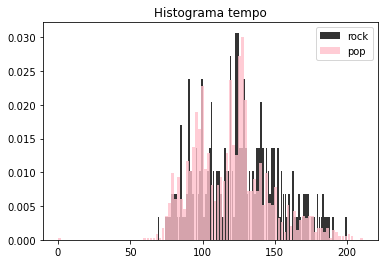

In [473]:
#Graficando histograma de energia
plt.hist(data_rock['tempo'], bins=100, alpha=0.8, density=True,color='black',rwidth=0.9,label='rock')
plt.hist(data_pop['tempo'],bins=100, alpha=0.8, density=True, color='pink',rwidth=0.9,label='pop')
plt.legend()
plt.title('Histograma tempo')
plt.show()

Como análisis de estos histogramas se puede ver que los dos géneros tienen una distribución similar para el tempo. En este caso el intervalo  tempo donde se acumulan la mayoría de frecuencias es aproximadamente el mismo entre 70 y 150 BPM.  Ambos géneros tienen un máximo cercano a los 125 BPM.  Para el caso del valence no se puede concluir un comportamiento similar entre los dos generos. su distibución es amplia y no tiene un comportamiento de frecuencias destacables. Y para el caso de energía sus dos histogramas están sesgados hacia la derecha. Lo que significa qe  la mayoría de canciones cuentan con energía muy alta

## Punto 7

Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra
dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

La pregunta a planteada es: ¿La energía y qué tan bailable es una canción afectan directemente su popularidad?

In [494]:
#Seleccionar solo variables  de interes 
data_ans=data_read.loc[(data_read['energy'].notnull()),('energy','danceability','popularity')]
#prueba_data.loc[(prueba_data['artist'].isin(list_artist)),'new_artist']=1 #Cambio estado a artista no nuevo

In [495]:
data_ans

,energy,danceability,popularity
0,0.834,0.751,77.0
1,0.897,0.434,79.0
2,0.496,0.529,66.0
3,0.913,0.551,78.0
4,0.928,0.614,0.0
...,...,...,...
1995,0.734,0.842,79.0
1996,0.702,0.552,78.0
1997,0.678,0.847,69.0
1998,0.520,0.741,75.0


Se inicia el análisis con una descripción de las variables

In [496]:
data_ans.describe()

,energy,danceability,popularity
count,1941.000000,1941.000000,1941.000000
mean,0.721292,0.666420,59.485832
std,0.153663,0.143771,21.662296
min,0.000000,0.000000,0.000000
25%,0.624000,0.581000,56.000000
50%,0.739000,0.676000,65.000000
75%,0.840000,0.765000,73.000000
max,0.999000,0.975000,89.000000


Con esto podemos obervar que el rango de energía va de 0 a 0.99 y el promedio de las canciones es de 0.72. Para la variable de danceability su minimo es 0 y va hasta 0.978 y popularidad entre 0 y 89 con un promedio de 59.48.  Para continuar con el análisis se procede a graficar el par de variables. 

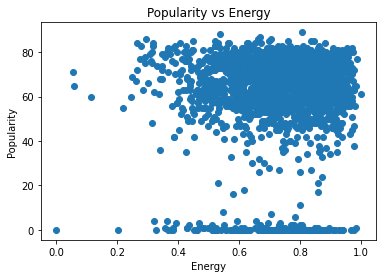

In [508]:
plt.figure()
plt.scatter(data_ans['energy'],data_ans['popularity'])
plt.title('Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

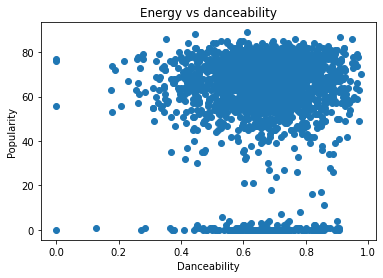

In [509]:
plt.figure()
plt.scatter(data_ans['danceability'],data_ans['popularity'])
plt.title('Energy vs danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

Con estas gráficas  individualmente no se puede ver un comportamiento que permita identificar alún tipo de relación entre las variables enery y danceability con popularity. Aunque si se comparan las dos gráficas podemos observar una ligera similitud entre las dos. Pues la mayoría de puntos se encuentran en la parte superior izquierda. De lo cual podriamos intuir que entre mayor energy y mayor danceability podría ser que su popularity sea más alta. Para seguir explorando y poder contestar la respuesta usaré un mapa de calor de correlación entre las tres variables. 

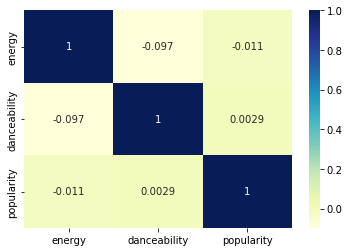

In [512]:
corre=data_ans.corr()
plot = sb.heatmap(corre, cmap="YlGnBu", annot=True)
plt.show()

Con la matriz de correlación se puede ver que los valores de correlación entre estas variables no son muy altos. Por lo tanto, no se puede afirmar que exista alguna correlación de danceability y energy  con popularity. Por lo que con este análisis, la respuesta a la pregunta sería que la energía y danceability no afectan la popularidad de una canción.